## Table of Contents
***

### [Management Summary](#summary)
- [Analytical Approach](#approach)
- [Key Insights](#key)

### [Problem Statement](#problem)
 - [Libraries](#library)
 - [Dataset](#data)
 - [Exploratory Data Analysis](#explore)
 - [Data Cleaning](#cleaning)
 - [Feature Engineering](#feature)

### [Univariate Analysis](#univariate)
 - [Overall Overview](#overview)
 - [Airort to Airport](#airport)
 - [Distance](#distance)
 - [Vendor](#vendor)
 - [Passengers](#passenger)
 - [Rate Code](#rate)   
 - [Store and forward flag](#flag)
 - [Speed](#speed)
 - [Trip Duration](#duration)
 - [Trips per Hour](#hour_trip)
 - [Trips per Time of Day](#timeday_trip)     
 - [Trips per Day](#day_trip)
 - [Trips per Month](#month_trip)
 - [Trips per Yeaar](#year_trip)
 - [Payment Method](#payment)
 - [Total Amount](#amount)

### [Correlation Analysis](#corr)
 - [Heatmap](#heatmap)


<a id=summary></a>
# Management Summary

<a id=approach></a>
## Analytical Approach

To obtain valuable insights, I decided to categorize the dataset into two distinct groups:

1- Airport Rides: This category includes rides that are specifically related to airports. These rides typically involve transportation to or from airports, such as trips to catch flights or journeys from airports to the city.

2- City Rides: This category encompasses rides that occur within the city limits. These rides primarily involve transportation within the urban areas, such as commuting to work, running errands, or exploring the city's attractions.

By dividing the dataset into these two categories, I aimed to analyze and compare various aspects, such as trip duration, trip distance, and other relevant features, in order to gain meaningful insights specific to each category.


<a id=key></a>
## Key Insights

There is a higher usage of taxis when people travel to New York City, specifically when the pick-up location is an airport (not considering the drop-off location).

A significant number of taxi rides to airports have a drop-off location in JFK Airport (zone 138). Similarly, a considerable portion of taxi rides from airports have a pick-up location in LaGuardia Airport (zone 138). 

There have been a total of 163 rides observed between the two airports in the dataset.This indicates instances where passengers have traveled directly between the airports, highlighting the need for transportation services catering to inter-airport travel.

A significant majority of the rides in the dataset are completed within a range of 15-30 km.

We observe that the number of trips taken by vendor 2 (VeriFone Inc) is more than three times that of vendor 1 (Creative Mobile Technologies, LLC).

The highest number of rides recorded were those with a single passenger.

Less than 1% of the total trips were stored before being forwarded.

The majority of trips in the dataset were conducted at a speed range of 30-40 km/h.

Regarding short trip durations, it is possible that passengers may have changed their minds and canceled the ride after a certain period of time. 
The majority of trips took approximately  24 to 30 minutes, to complete.

The busiest hours for picking up passengers from airports are between 3 PM and 10 PM. However, there is a contrasting pattern observed when the airport is the destination.

Evenings experience the highest demand for airport pickups, while mornings and afternoons observe higher demand for airport drop-offs.

Monday and Sunday exhibit the highest levels of activity for airport pickups, while Friday appears to be the busiest day for airport drop-offs. 

The usage of taxis experiences an increase between May and August. This finding aligns with expectations, as the summer months often witness a high travel demand, with people visiting New York City for vacations and leisure activities. 

The COVID-19 pandemic had a substantial impact on the total volume of airport trips observed in both 2020 and 2021, leading to a significant decrease.

Passengers predominantly used credit card (payment mode 1) for payments more than any other payment mode. 

There is an increased usage of taxis when the total fare amount falls within the range of approximately $40 to $50 for trips to airports.

<a id=problem></a>
# Problem Statement

<a id=library></a>
## Import libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

%matplotlib inline
matplotlib.style.use('fivethirtyeight')


<a id=data></a>
## Import Dataset

In [2]:
#import the data from a csv file.

df = pd.read_csv('Yellow_Taxi_Assignment.csv')

<a id=explore></a>
## Exploratory Data Analysis

We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN


In [4]:
# Lets see shape of dataset

df.shape

(304978, 19)

In [5]:
# duplicates

td =sum(df.duplicated())
print( f"There are/is {td} duplicate row/s.")

There are/is 0 duplicate row/s.


In [6]:
# Lets add trip_id to dataset

df['id'] = range(1, len(df) + 1)

Lets divide dataset into 2 categories: taxi_airport and taxi_city.
 it help us to obtain meaningful insights, as we know the duration and distance of trip to airport is longer than urban trips. in this code I go deep dive into taxi_airport and Icreate another code for investigating in taxi_city .

New York is served by several airports,based on the research I have done the zone number for airport is:\
zone 132 = John F. Kennedy International Airport (JFK): Located in the borough of Queens, JFK is the primary international airport serving New York City.\
zone 138 = LaGuardia Airport (LGA): Also situated in Queens, LaGuardia primarily handles domestic flights and some international flights.\
zone 1 = Newark Liberty International Airport (EWR): Although technically located in Newark, New Jersey, Newark Airport serves the New York metropolitan area and is a major gateway to the region.

In [7]:
# Lets define dataframe for trips fram the airports and to the airports

to_airport = df.loc[df['DOLocationID'].isin([1,132,138])]
from_airport = df.loc[df['PULocationID'].isin([1,132,138])]

In [8]:
# Lets define dataframe taxi_airport & taxi_city

taxi_airport = pd.concat([to_airport, from_airport])
taxi_airport.drop_duplicates(inplace=True)
taxi_airport.set_index('id', inplace=True)
df.set_index('id', inplace=True)
taxi_city = df.loc[df.index.difference(taxi_airport.index)]

taxi_airport.shape

(21869, 19)

In [9]:
# Rename taxi_airport to df for rest of analysis

df = taxi_airport

In [10]:
taxi_city.shape

(283109, 19)

<a id=cleaning></a>
## Data Cleaning 

In [11]:
# Lets convert column names to lowercase

df.columns = df.columns.str.lower() 
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [12]:
# Lets change column name's format

df.rename(columns={'vendorid':'vendor_id','ratecodeid':'rate_code_id','pulocationid':'pu_location_id','dolocationid':'do_location_id'}, inplace=True)
# 
df.columns

Index(['vendor_id', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'rate_code_id',
       'store_and_fwd_flag', 'pu_location_id', 'do_location_id',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [13]:
# Checking for missing values

for col in df.columns:
    missing = df[col].isna().sum()
    print(f"Missing values in {col}: {missing}")

Missing values in vendor_id: 0
Missing values in tpep_pickup_datetime: 0
Missing values in tpep_dropoff_datetime: 0
Missing values in passenger_count: 325
Missing values in trip_distance: 0
Missing values in rate_code_id: 325
Missing values in store_and_fwd_flag: 325
Missing values in pu_location_id: 0
Missing values in do_location_id: 0
Missing values in payment_type: 0
Missing values in fare_amount: 0
Missing values in extra: 0
Missing values in mta_tax: 0
Missing values in tip_amount: 0
Missing values in tolls_amount: 0
Missing values in improvement_surcharge: 0
Missing values in total_amount: 0
Missing values in congestion_surcharge: 4947
Missing values in airport_fee: 12349


There are only 325 missing values in passenger_count, rate_code_id and store_and_fwd_flagso I will drop them.

In [14]:
# Lets drop missing value from passenger_count, rate_code_id, store_and_fwd_flag

df['passenger_count'].dropna(inplace=True)
df['rate_code_id'].dropna(inplace=True)
df['store_and_fwd_flag'].dropna(inplace=True)

In [15]:
for col in df.columns:
    missing = df[col].isna().sum()
    print(f"Missing values in {col}: {missing}")

Missing values in vendor_id: 0
Missing values in tpep_pickup_datetime: 0
Missing values in tpep_dropoff_datetime: 0
Missing values in passenger_count: 0
Missing values in trip_distance: 0
Missing values in rate_code_id: 0
Missing values in store_and_fwd_flag: 0
Missing values in pu_location_id: 0
Missing values in do_location_id: 0
Missing values in payment_type: 0
Missing values in fare_amount: 0
Missing values in extra: 0
Missing values in mta_tax: 0
Missing values in tip_amount: 0
Missing values in tolls_amount: 0
Missing values in improvement_surcharge: 0
Missing values in total_amount: 0
Missing values in congestion_surcharge: 4947
Missing values in airport_fee: 12349


In [16]:
# Lets see decription of dataset

df.describe()

,vendor_id,passenger_count,trip_distance,rate_code_id,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,21869.000000,21544.000000,21869.000000,21544.000000,21869.000000,21869.000000,21869.000000,21869.000000,21869.000000,21869.000000,21869.000000,21869.000000,21869.000000,21869.000000,16922.000000,9520.000000
mean,1.699575,1.542796,21.209486,1.463424,141.750332,142.208743,1.271800,40.724827,0.918597,0.476857,6.534123,3.873322,0.318684,53.932569,1.373966,0.910583
std,0.472018,1.120684,1198.500992,1.010119,35.373010,69.665029,0.524784,17.528841,1.570020,0.115717,5.611627,3.805780,0.131496,22.720281,1.251292,0.571114
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-104.000000,-6.000000,-0.500000,-20.000000,-13.750000,-1.000000,-103.650000,-2.500000,-1.250000
25%,1.000000,1.000000,9.200000,1.000000,132.000000,100.000000,1.000000,29.500000,0.000000,0.500000,0.000000,0.000000,0.300000,40.600000,0.000000,0.000000
50%,2.000000,1.000000,12.110000,1.000000,132.000000,138.000000,1.000000,40.500000,0.000000,0.500000,7.000000,5.760000,0.300000,53.460000,2.500000,1.250000
75%,2.000000,2.000000,17.800000,2.000000,138.000000,189.000000,2.000000,52.000000,1.000000,0.500000,10.560000,6.550000,0.300000,68.560000,2.500000,1.250000
max,5.000000,6.000000,177247.400000,99.000000,265.000000,265.000000,4.000000,275.550000,18.500000,2.540000,95.000000,63.540000,1.000000,310.700000,2.750000,1.250000


###### Some insights from the above summary:

1.    Vendor id has a minimum value of 1 and a maximum value of 6 which doesn't make sense as we saw in data dictionary there are two vendor ids 1 and 2. we will drop invalid data.
2.    Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.
3.    Trip distance has a minimum value of 0 which doesn't make sense as . we will drop invalid data.
4. There are negative value in some columns which doesn't make sense.
5. The minimal fare_amount is negative. As this does not seem to be realistic I will drop them from the dataset.
6. payment_type has a minimum value of 0 which doesn't make sense as we saw in data dictionary it can get value range between 1 and 6. we will drop invalid data.
7. Rate code ID has a minimum value of 1 and a maximum value of 99 which doesn't make sense as we saw in data dictionary there are only six rate code ids.

In [17]:
# Lets check the values in vendor_id

df['vendor_id'].value_counts()

2    15163
1     6661
4       44
5        1
Name: vendor_id, dtype: int64

We know there are two vendor ids 1 and 2 in data dictionary. so we need to drop other vendor ids.

In [18]:
# Lets clean values in vendor_id

df = df.drop(df[df.vendor_id.isin([4,5])].index)

In [19]:
# Lets check again the values in vendor_id 

df['vendor_id'].value_counts()

2    15163
1     6661
Name: vendor_id, dtype: int64

In [20]:
# Lets check the values in rate_code_id

df['rate_code_id'].value_counts() 

1.0     13790
2.0      6556
3.0       534
5.0       387
4.0       232
99.0        1
Name: rate_code_id, dtype: int64

We saw in data dictionary there are only six rate code ids from 1 to 6. so the value 99 is invalid here.

In [21]:
# Lets clean values in rate_code_id

df = df[df['rate_code_id'] != 99]
df['rate_code_id'].value_counts() 

1.0    13790
2.0     6556
3.0      534
5.0      387
4.0      232
Name: rate_code_id, dtype: int64

In [22]:
# Lets Check zeros in numeric columns

def check_for_zeros(df):
    for col in df.columns:
        zeros = df[df[col] == 0].shape[0]
        print(f"Zeros in {col}:{zeros}")
        
check_for_zeros(df)

Zeros in vendor_id:0
Zeros in tpep_pickup_datetime:0
Zeros in tpep_dropoff_datetime:0
Zeros in passenger_count:362
Zeros in trip_distance:305
Zeros in rate_code_id:0
Zeros in store_and_fwd_flag:0
Zeros in pu_location_id:0
Zeros in do_location_id:0
Zeros in payment_type:324
Zeros in fare_amount:13
Zeros in extra:11730
Zeros in mta_tax:832
Zeros in tip_amount:6584
Zeros in tolls_amount:9191
Zeros in improvement_surcharge:17
Zeros in total_amount:4
Zeros in congestion_surcharge:7563
Zeros in airport_fee:2480


passenger_count, trip_distance, payment_type, payment_type, far_amount, total_amount and other columns all contain zero.


Without distance, we can't determine fare amount. There isn't much of a choice but to drop these.

The reasons for 0 mile distance can be:
* The dropoff location couldn’t be tracked.
* The driver deliberately took this ride to complete a target ride number.
* The passengers canceled the trip.

Passenger count is a driver entered value. Since the trip is not possible without passengers. It is evident that the driver forgot to enter the value for the trips with 0 passenger count. Lets analyze the passenger count distribution further to make it consistent for further analysis


In [23]:
df.passenger_count.describe()

count    21499.000000
mean         1.543886
std          1.121541
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [24]:
df.passenger_count.value_counts()

1.0    14647
2.0     3952
3.0      998
5.0      661
4.0      466
6.0      413
0.0      362
Name: passenger_count, dtype: int64

In [25]:
# Dropping rows with negative or 0 values in columns where it is not allowed

df = df[df['passenger_count'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['fare_amount'] > 0]
df = df[df['payment_type'] > 0]

check_for_zeros(df)

Zeros in vendor_id:0
Zeros in tpep_pickup_datetime:0
Zeros in tpep_dropoff_datetime:0
Zeros in passenger_count:0
Zeros in trip_distance:0
Zeros in rate_code_id:0
Zeros in store_and_fwd_flag:0
Zeros in pu_location_id:0
Zeros in do_location_id:0
Zeros in payment_type:0
Zeros in fare_amount:0
Zeros in extra:11116
Zeros in mta_tax:717
Zeros in tip_amount:6156
Zeros in tolls_amount:8597
Zeros in improvement_surcharge:8
Zeros in total_amount:0
Zeros in congestion_surcharge:7120
Zeros in airport_fee:2385


In [26]:
# Lets convert trip_distance from mile to Km

df['trip_distance']= df['trip_distance'] * 1.60934

In [27]:
# Lets check dataset again

df.describe()

,vendor_id,passenger_count,trip_distance,rate_code_id,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,16286.000000,9158.000000
mean,1.703391,1.571780,21.443373,1.442143,141.936940,142.49181,1.273148,41.055263,0.922871,0.482845,6.555362,3.922707,0.321837,54.377754,1.407052,0.924465
std,0.456773,1.114934,9.043851,0.720521,34.358708,70.07761,0.470002,16.582245,1.560100,0.092454,5.571712,3.763649,0.122170,21.659129,1.240150,0.548615
min,1.000000,1.000000,0.016093,1.000000,1.000000,1.00000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000
25%,1.000000,1.000000,14.966862,1.000000,132.000000,96.00000,1.000000,29.500000,0.000000,0.500000,0.000000,0.000000,0.300000,40.860000,0.000000,0.000000
50%,2.000000,1.000000,19.794882,1.000000,132.000000,138.00000,1.000000,40.500000,0.000000,0.500000,7.000000,5.760000,0.300000,53.520000,2.500000,1.250000
75%,2.000000,2.000000,28.710626,2.000000,138.000000,193.00000,2.000000,52.000000,1.000000,0.500000,10.560000,6.550000,0.300000,68.450000,2.500000,1.250000
max,2.000000,6.000000,131.241677,5.000000,265.000000,265.00000,4.000000,275.550000,11.250000,2.540000,95.000000,63.540000,1.000000,310.700000,2.750000,1.250000


it seems dataset was cleaned and there is no negative amount in total amount and fare amount.

In [28]:
# Lets check the number of null values in dataset

df.isnull().sum()

vendor_id                    0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
rate_code_id                 0
store_and_fwd_flag           0
pu_location_id               0
do_location_id               0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge      4472
airport_fee              11600
dtype: int64

<a id=feature></a>
## Feature Engineering

In [29]:
# Lets check the datatypes and non-null count in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 26 to 304971
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_id              20758 non-null  int64  
 1   tpep_pickup_datetime   20758 non-null  object 
 2   tpep_dropoff_datetime  20758 non-null  object 
 3   passenger_count        20758 non-null  float64
 4   trip_distance          20758 non-null  float64
 5   rate_code_id           20758 non-null  float64
 6   store_and_fwd_flag     20758 non-null  object 
 7   pu_location_id         20758 non-null  int64  
 8   do_location_id         20758 non-null  int64  
 9   payment_type           20758 non-null  int64  
 10  fare_amount            20758 non-null  float64
 11  extra                  20758 non-null  float64
 12  mta_tax                20758 non-null  float64
 13  tip_amount             20758 non-null  float64
 14  tolls_amount           20758 non-null  float64
 15  

In [30]:
# Lets first convert the pickup time and dropoff time to datetime from object type

df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
print('data type tpep_pickup_datetime is:', df.tpep_pickup_datetime.dtype)
print('data type tpep_dropoff_datetime is:', df.tpep_dropoff_datetime.dtype)

data type tpep_pickup_datetime is: datetime64[ns]
data type tpep_dropoff_datetime is: datetime64[ns]


In [31]:
# Lets create new columns from pickup time to get more clear insights :

df['hour']=df['tpep_pickup_datetime'].dt.hour
df['day']=df['tpep_pickup_datetime'].dt.day_name()
df['month']=df['tpep_pickup_datetime'].dt.month
df['year']=df['tpep_pickup_datetime'].dt.year
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['trip_duration']=(df.duration.dt.seconds)/3600
df['speed'] = df['trip_distance'] /df['trip_duration']
df.head()

,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,...,total_amount,congestion_surcharge,airport_fee,hour,day,month,year,duration,trip_duration,speed
id,,,,,,,,,,,,,,,,,,,,,
26,2,2018-01-01 09:18:16,2018-01-01 09:48:35,1.0,27.728928,2.0,N,141,132,2,...,52.80,NaN,NaN,9,Monday,1,2018,00:30:19,0.505278,54.878582
87,1,2018-01-01 11:06:11,2018-01-01 11:20:21,1.0,15.449664,1.0,N,148,138,4,...,27.80,NaN,NaN,11,Monday,1,2018,00:14:10,0.236111,65.433871
101,2,2018-01-01 13:01:12,2018-01-01 13:34:59,1.0,35.051425,2.0,N,142,132,1,...,66.56,NaN,NaN,13,Monday,1,2018,00:33:47,0.563056,62.252161
108,2,2018-01-01 13:53:43,2018-01-01 14:26:22,1.0,27.519714,2.0,N,230,132,1,...,64.56,NaN,NaN,13,Monday,1,2018,00:32:39,0.544167,50.572216
133,1,2018-01-01 11:55:10,2018-01-01 12:18:05,2.0,16.576202,1.0,N,68,138,1,...,37.06,NaN,NaN,11,Monday,1,2018,00:22:55,0.381944,43.399511


 We have created the following features:

- day and dropoff_day which will contain the name of the day on which the ride was taken.
- day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.
- hour and dropoff_hour with an hour of the day in the 24-hour format.
- month and dropoff_month with month number with January=1 and December=12
- trip_duration is the time beetween drop off and pick up
- trip_duration calculate based on hour
- speed (Km/h)

I have defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [32]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

Now let us apply this function and create new columns in the dataset.

In [33]:
df['time_of_day']=df['hour'].apply(time_of_day)

The only dropoff information we needed to calculate the length of the trip was tpep_dropoff_datetime .\
Now, the datetime columns can be dropped entirely!

In [34]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [35]:
df.reset_index(inplace=True)

In [36]:
df.describe()

,id,vendor_id,passenger_count,trip_distance,rate_code_id,pu_location_id,do_location_id,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,month,year,duration,trip_duration,speed
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.00000,20758.000000,20758.000000,20758.000000,...,20758.000000,20758.000000,16286.000000,9158.000000,20758.000000,20758.000000,20758.000000,20758,20758.000000,2.075800e+04
mean,159112.058483,1.703391,1.571780,21.443373,1.442143,141.936940,142.49181,1.273148,41.055263,0.922871,...,0.321837,54.377754,1.407052,0.924465,14.059881,6.616052,2020.142018,0 days 00:39:01.608440,0.650447,inf
std,95775.855658,0.456773,1.114934,9.043851,0.720521,34.358708,70.07761,0.470002,16.582245,1.560100,...,0.122170,21.659129,1.240150,0.548615,5.676105,3.473226,1.573455,0 days 01:10:36.058071,1.176683,NaN
min,11.000000,1.000000,1.000000,0.016093,1.000000,1.000000,1.00000,1.000000,0.010000,0.000000,...,0.000000,0.310000,0.000000,0.000000,0.000000,1.000000,2018.000000,0 days 00:00:00,0.000000,2.962733e-02
25%,73687.250000,1.000000,1.000000,14.966862,1.000000,132.000000,96.00000,1.000000,29.500000,0.000000,...,0.300000,40.860000,0.000000,0.000000,10.000000,4.000000,2019.000000,0 days 00:23:20,0.388889,2.896812e+01
50%,154811.500000,2.000000,1.000000,19.794882,1.000000,132.000000,138.00000,1.000000,40.500000,0.000000,...,0.300000,53.520000,2.500000,1.250000,15.000000,7.000000,2020.000000,0 days 00:32:48,0.546667,3.775178e+01
75%,251734.250000,2.000000,2.000000,28.710626,2.000000,138.000000,193.00000,2.000000,52.000000,1.000000,...,0.300000,68.450000,2.500000,1.250000,18.000000,10.000000,2022.000000,0 days 00:45:05,0.751389,4.821968e+01
max,304971.000000,2.000000,6.000000,131.241677,5.000000,265.000000,265.00000,4.000000,275.550000,11.250000,...,1.000000,310.700000,2.750000,1.250000,23.000000,12.000000,2023.000000,0 days 23:59:28,23.991111,inf


  Now that the dates have been broken down properly, and we have our trip duration sorted out, we can clean these new features!
 
 First, any trips with a duration of 0 need to be dropped. These trips won't be useful, and are certaintly caused by a data entry error.these rows affected on speed calculation.\
 Second, we can investigate what years are available in this dataset, how much of the dataset each year makes up, and begin investigating whether we should keep all years, or only specific years by visualizing trends in fare amounts when compared to trip duration and distance.\
 For short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.lets keep them.\
I remove outlier from dataset.

In [37]:
df1=df[['id','speed','trip_distance','trip_duration']]
df1.shape

(20758, 4)

In [38]:
# Lets define a function to remove outlier

def remove_outliers(data):

        '''
        Remove outliers from the dataset
        
        Parameters:
        - data : Feature set / dataframe
        '''
        first_quartile = data.quantile(0.25)
        third_quartile = data.quantile(0.75)
        interquartile_range = third_quartile - first_quartile
        #print(interquartile_range)
        print('Before outlier removal, dataset dimension was :',data.shape)
        data = data[~((data < (first_quartile - 1.5 * interquartile_range)) |(data > (third_quartile + 1.5 * interquartile_range))).any(axis=1)]
        print('After outlier removal, dataset dimension was :',data.shape)
        return data

In [39]:
df1 = remove_outliers(df1)

Before outlier removal, dataset dimension was : (20758, 4)
After outlier removal, dataset dimension was : (20063, 4)


In [40]:
# Lets keep only id column

df1 = df1.drop(['trip_duration', 'speed','trip_distance'], axis=1)

In [41]:
df = pd.merge(df1, df, on=['id'], how='left')
df.head()

,id,vendor_id,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,...,congestion_surcharge,airport_fee,hour,day,month,year,duration,trip_duration,speed,time_of_day
0,26,2,1.0,27.728928,2.0,N,141,132,2,52.0,...,NaN,NaN,9,Monday,1,2018,00:30:19,0.505278,54.878582,Morning
1,87,1,1.0,15.449664,1.0,N,148,138,4,27.0,...,NaN,NaN,11,Monday,1,2018,00:14:10,0.236111,65.433871,Morning
2,101,2,1.0,35.051425,2.0,N,142,132,1,52.0,...,NaN,NaN,13,Monday,1,2018,00:33:47,0.563056,62.252161,Afternoon
3,108,2,1.0,27.519714,2.0,N,230,132,1,52.0,...,NaN,NaN,13,Monday,1,2018,00:32:39,0.544167,50.572216,Afternoon
4,133,1,2.0,16.576202,1.0,N,68,138,1,30.5,...,NaN,NaN,11,Monday,1,2018,00:22:55,0.381944,43.399511,Morning


count    20063.000000
mean        21.082398
std          8.540027
min          0.016093
25%         14.918582
50%         19.408640
75%         28.533598
max         49.245804
Name: trip_distance, dtype: float64

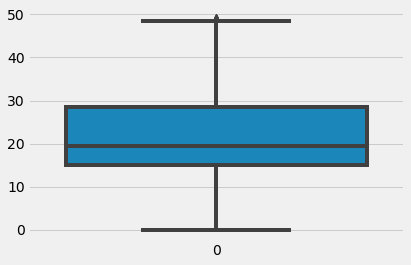

In [42]:
# Let's now have a look on the distribution of the distance

sns.boxplot(data = df.trip_distance)
df.trip_distance.describe()

count    20063.000000
mean         0.571323
std          0.255950
min          0.000833
25%          0.386528
50%          0.539722
75%          0.734167
max          1.295000
Name: trip_duration, dtype: float64

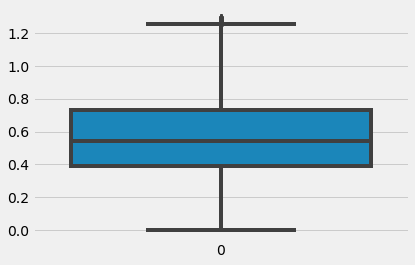

In [43]:
# Lets check trip_duration 

sns.boxplot(data = df.trip_duration)
df.trip_duration.describe()

count    20063.000000
mean        39.381005
std         13.207264
min          0.112225
25%         29.521651
50%         37.982563
75%         48.161974
max         77.017556
Name: speed, dtype: float64

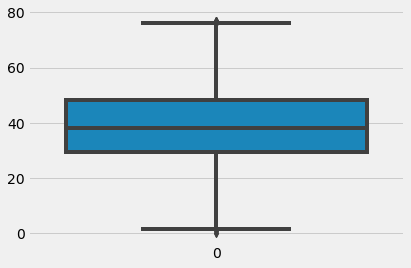

In [44]:
# Lets check speed 

sns.boxplot(data = df.speed)
df.speed.describe()

In [45]:
# Lets check years

list_of_years = df.year.unique()
print(list_of_years)

[2018 2019 2020 2021 2022 2023]


In [46]:
# Lets see the distribution of year(%)

for year in list_of_years:
    year_amount = df[df['year'] == year].shape[0]
    total_amount = df.shape[0]
    
    print(f"{year} makes up {round((year_amount / total_amount) * 100)} % of the dataset")

2018 makes up 21 % of the dataset
2019 makes up 22 % of the dataset
2020 makes up 11 % of the dataset
2021 makes up 17 % of the dataset
2022 makes up 27 % of the dataset
2023 makes up 2 % of the dataset


it seems we can keep all years but it's better to remove data of 2023.

In [47]:
# Lets remove the year 2023

df= df[df['year'] != 2023]
list_of_years = df.year.unique()
print(list_of_years)

[2018 2019 2020 2021 2022]


Lets Calculate total amounts and drop rows whose values don't "add up"...

In [48]:
fare = df['fare_amount'].values
extra = np.add(fare, df['extra'].values)
mta_tax = np.add(extra, df['mta_tax'].values)
tip_amount = np.add(mta_tax, df['tip_amount'].values)
imp_surcharge = np.add(tip_amount, df['improvement_surcharge'].values)
calculated_total_amount = np.add(imp_surcharge, df['tolls_amount'].values)

df['calculated_total_amount'] = pd.Series(calculated_total_amount)
# validate calculated total by manually adding all relevant columns and comparing to the calculated column
df[{'calculated_total_amount', 'total_amount'}].head()


,total_amount,calculated_total_amount
0,52.80,52.80
1,27.80,27.80
2,66.56,66.56
3,64.56,64.56
4,37.06,37.06


Lets drop anything that isn't correct

In [49]:
df = df[df['total_amount'] != df['calculated_total_amount']]
df.head()

,id,vendor_id,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,...,airport_fee,hour,day,month,year,duration,trip_duration,speed,time_of_day,calculated_total_amount
7,242,2,5.0,27.036912,2.0,N,186,132,2,52.0,...,NaN,1,Tuesday,1,2018,00:25:36,0.426667,63.367762,Late night,58.56
8,309,2,1.0,17.573993,1.0,N,163,138,1,36.0,...,NaN,9,Wednesday,1,2018,00:33:07,0.551944,31.840148,Morning,44.56
9,350,2,1.0,16.753229,1.0,N,141,138,1,31.0,...,NaN,16,Wednesday,1,2018,00:37:39,0.627500,26.698374,Evening,46.27
10,354,2,1.0,27.680648,2.0,N,229,132,1,52.0,...,NaN,5,Wednesday,1,2018,00:29:41,0.494722,55.951899,Late night,70.27
11,359,2,4.0,27.149566,2.0,N,100,132,1,52.0,...,NaN,4,Wednesday,1,2018,00:25:29,0.424722,63.923111,Late night,70.27


In [50]:
# Let's drop unnecessary columns

df.drop(['fare_amount', 'extra','mta_tax','tolls_amount','improvement_surcharge','congestion_surcharge','duration','calculated_total_amount','airport_fee'], axis=1, inplace=True)
df.head()

,id,vendor_id,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,tip_amount,total_amount,hour,day,month,year,trip_duration,speed,time_of_day
7,242,2,5.0,27.036912,2.0,N,186,132,2,0.00,58.56,1,Tuesday,1,2018,0.426667,63.367762,Late night
8,309,2,1.0,17.573993,1.0,N,163,138,1,2.00,44.56,9,Wednesday,1,2018,0.551944,31.840148,Morning
9,350,2,1.0,16.753229,1.0,N,141,138,1,7.71,46.27,16,Wednesday,1,2018,0.627500,26.698374,Evening
10,354,2,1.0,27.680648,2.0,N,229,132,1,11.71,70.27,5,Wednesday,1,2018,0.494722,55.951899,Late night
11,359,2,4.0,27.149566,2.0,N,100,132,1,11.71,70.27,4,Wednesday,1,2018,0.424722,63.923111,Late night


<a id=univariate></a>
# Univariate Analysis

<a id='overview'></a>
## Overall Overview

In [51]:
# Lets define again dataframe for trips fram the airports and to the airports from

to_airport = df.loc[df['do_location_id'].isin([1,132,138])]
from_airport = df.loc[df['pu_location_id'].isin([1,132,138])]

In [52]:
#lets look at the data:

print( f"There are {from_airport.shape[0]} rides from Airports.")
print( f"There are {to_airport.shape[0]} rides to Airports.")

There are 14817 rides from Airports.
There are 3209 rides to Airports.


it shows people used more taxi when travel to New York (pick up location is airports).


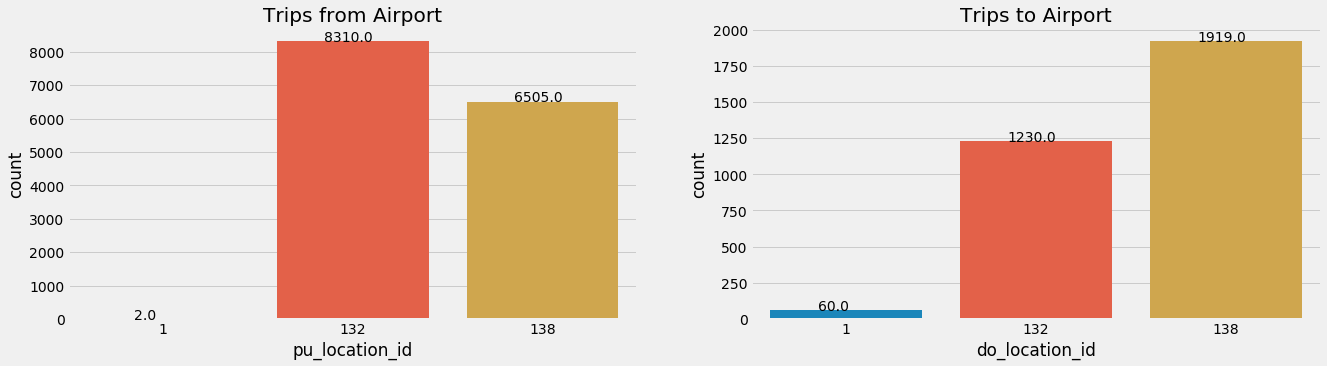

In [53]:
# Lets plot the number of trips in airports

figure,(ax7,ax8)=plt.subplots(ncols=2,figsize=(20,5))

ax =sns.countplot(x='pu_location_id',data=from_airport,ax=ax7)
ax7.set_title('Trips from Airport')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


ax=sns.countplot(x='do_location_id',data=to_airport,ax=ax8 )
ax8.set_title('Trips to Airport')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


we can see above: 
Most taxi rides to airports have a drop off location in JFK Airport (zone 138) and most taxi rides from airports have a pick up location in LaGuardia Airport (zone 138)

This finding suggests that JFK Airport is a popular destination for taxi drop-offs, while LaGuardia Airport is frequently used as a starting point for taxi rides. Understanding these patterns can help in optimizing taxi services and anticipating the demand at specific airport locations.

<a id='airport'></a>
##  Airport to Airport

In [54]:
# Lets select dataframe for trips between airports

A2A= from_airport.loc[from_airport['do_location_id'].isin([1,132,138])]


In [55]:
#lets look at the data:

print( f"There are {A2A.shape[0]} rides between two Airports.")

There are 163 rides between two Airports.


This indicates instances where passengers have traveled directly between the airports, highlighting the need for transportation services catering to inter-airport travel.

<a id='distance'></a>
## Distance

In [56]:
df.trip_distance.describe()

count    17863.000000
mean        21.065522
std          8.414677
min          0.016093
25%         14.854208
50%         19.199426
75%         28.549692
max         49.245804
Name: trip_distance, dtype: float64

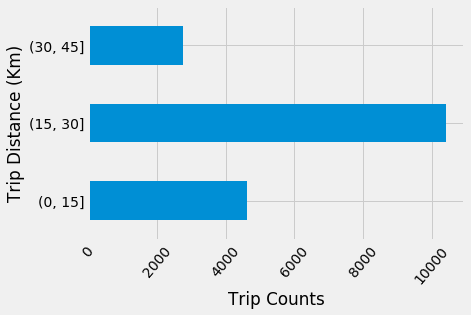

In [57]:
df.trip_distance.groupby(pd.cut(df.trip_distance, np.arange(0,51,15))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Distance (Km)')
plt.xticks(rotation=50)
plt.show()

From the above observation it is evident that most of the rides are completed between 15-30 Km.\

<a id=vendor></a>
## Vendor

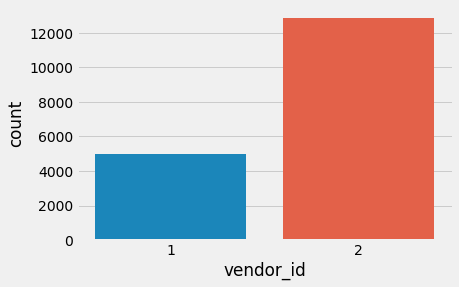

In [58]:
# Lets compare two vendors

sns.countplot(x='vendor_id',data=df)

We see that the number of trips taken by vendor 2 (VeriFone Inc) is more than vendor 1 (Creative Mobile Technologies, LLC).

<a id=passenger></a>
## Passengers

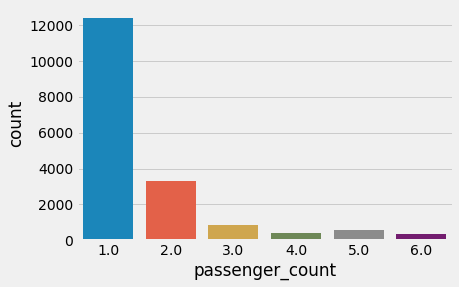

In [59]:
# Lets see the distribution of passenger_count

sns.countplot(x='passenger_count', data=df)

From above plot we can observe that the single passenger rides were highest.

<a id='rate'></a>
## Rate Code

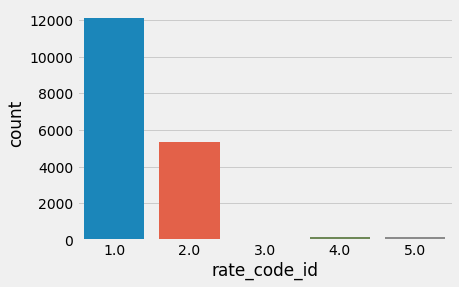

In [60]:
# Lets plot the rate_code_id

sns.countplot(x='rate_code_id', data=df)

We can clearly see that rate_code_id 1 i.e., standard rate is overwhelmingly more than others.

<a id='flag'></a>
## Store and Forward Flag

In [61]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.991659
Y    0.008341
Name: store_and_fwd_flag, dtype: float64

We see there are less than 1% of trips that were stored before forwarding.

<a id='speed'></a>
## Speed

Maximum speed limit in NYC is as follows:

* 25 mph in urban area i.e. 40 km/h
* 65 mph on controlled state highways i.e. approx 104 km/h


In [62]:
df.speed.describe()

count    17863.000000
mean        39.256758
std         13.052385
min          0.112225
25%         29.469916
50%         37.817389
75%         47.829640
max         77.017556
Name: speed, dtype: float64

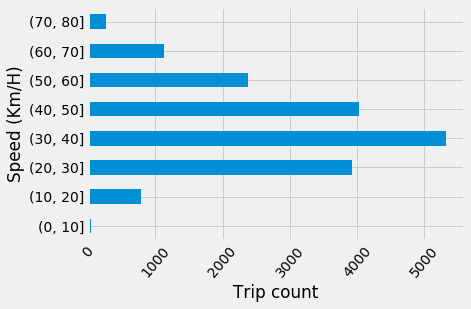

In [63]:
# Let's take a look at the speed range distribution 

df.speed.groupby(pd.cut(df.speed, np.arange(0,81,10))).count().plot(kind = 'barh')
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.xticks(rotation=50)
plt.show()

Mostly trips are done at a speed range of 30-40 km/h.


<a id='duration'></a>
## Trip Duration

In [64]:
df.trip_duration.describe()

count    17863.000000
mean         0.573280
std          0.251995
min          0.000833
25%          0.388611
50%          0.540556
75%          0.733472
max          1.294444
Name: trip_duration, dtype: float64

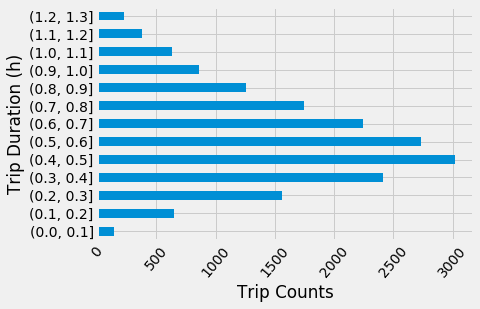

In [65]:
# Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... hours respectively

df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,1.4,0.1))).count().plot(kind = 'barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (h)')
plt.xticks(rotation=50)
plt.show()

- For short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.lets skip them.
- We can observe that most of trip took 0.4 - 0.5 (h) to complete i.e. approx 24-30 min.


<a id='hour_trip'></a>
## Trips per Hour

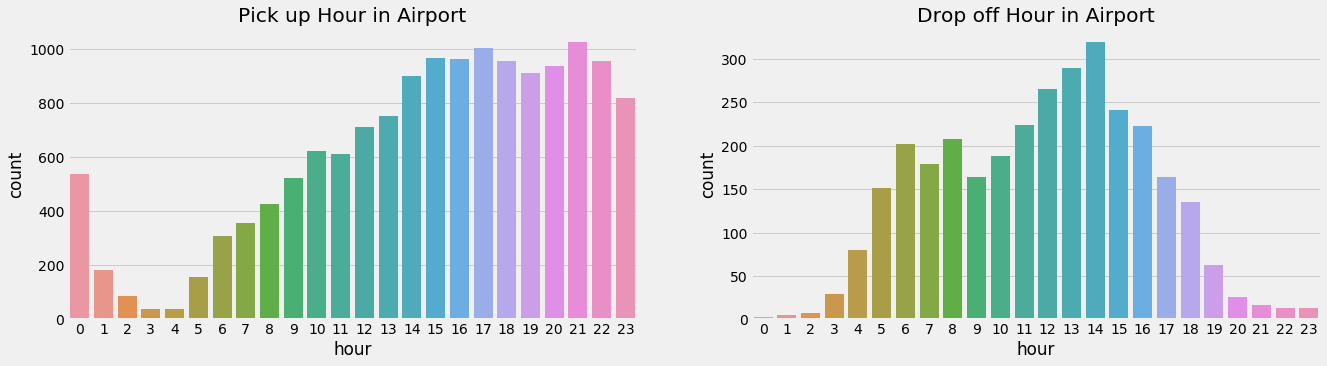

In [66]:
# Lets see the highest demand hour for airports

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pick up Hour in Airport')
ax=sns.countplot(x='hour',data=from_airport,ax=ax9 )

ax10.set_title('Drop off Hour in Airport')
ax=sns.countplot(x='hour',data=to_airport,ax=ax10)

 We can see that between 3 PM and 22 PM seem to be the busiest hours for pick up from airports. There is a contrasting pattern observed in airports when airport is destination. 

<a id='timeday_trip'></a>
## Trips per Time of Day

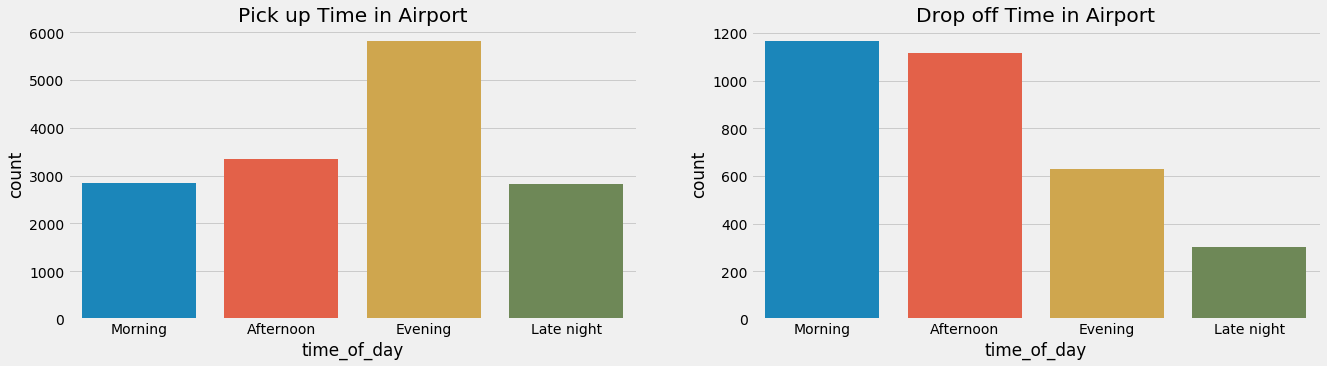

In [67]:
# Lets see the highest demand time of day for airports

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pick up Time in Airport')
ax=sns.countplot(x='time_of_day',data=from_airport,order=['Morning','Afternoon','Evening','Late night'],ax=ax9 )

ax10.set_title('Drop off Time in Airport')
ax=sns.countplot(x='time_of_day',data=to_airport,order=['Morning','Afternoon','Evening','Late night'],ax=ax10)

 it can be inferred that evenings experience the highest demand for airport pickups.for airport drop off it is Morning and Afternoon.This indicates distinct patterns in the timing of taxi demand based on whether the airport is the pickup or drop-off location.

<a id='day_trip'></a>
## Trips per Day

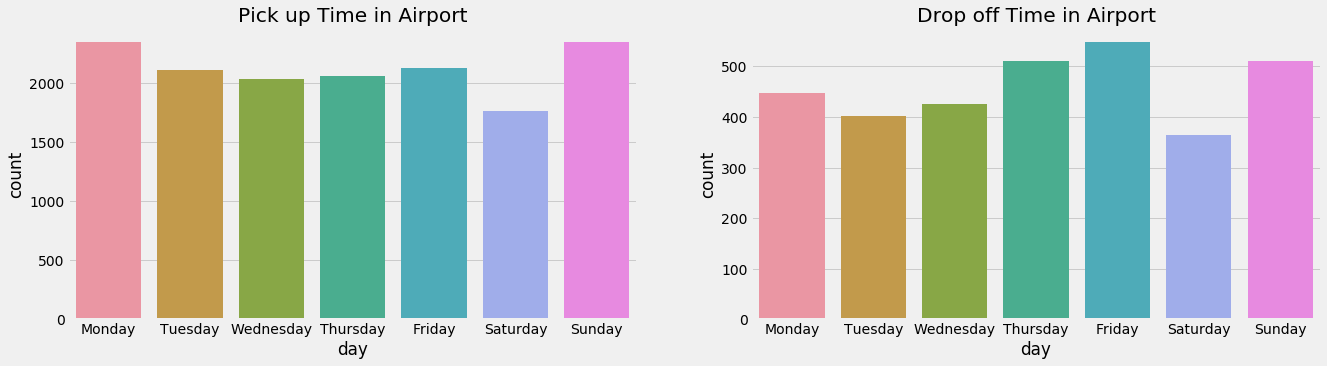

In [68]:
# Lets see the highest demand day for airports

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pick up Time in Airport')
ax=sns.countplot(x='day',data=from_airport,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ax=ax9 )

ax10.set_title('Drop off Time in Airport')
ax=sns.countplot(x='day',data=to_airport,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ax=ax10)

The analysis indicates that Monday and Sunday exhibit the highest levels of activity for airport pickups, while Friday appears to be the busiest day for airport drop-offs. This observation suggests distinct patterns in taxi demand based on the day of the week, with Mondays and Sundays being particularly busy for airport pickups and Fridays experiencing a higher demand for airport drop-offs.

<a id='month_trip'></a>
## Trips per Month

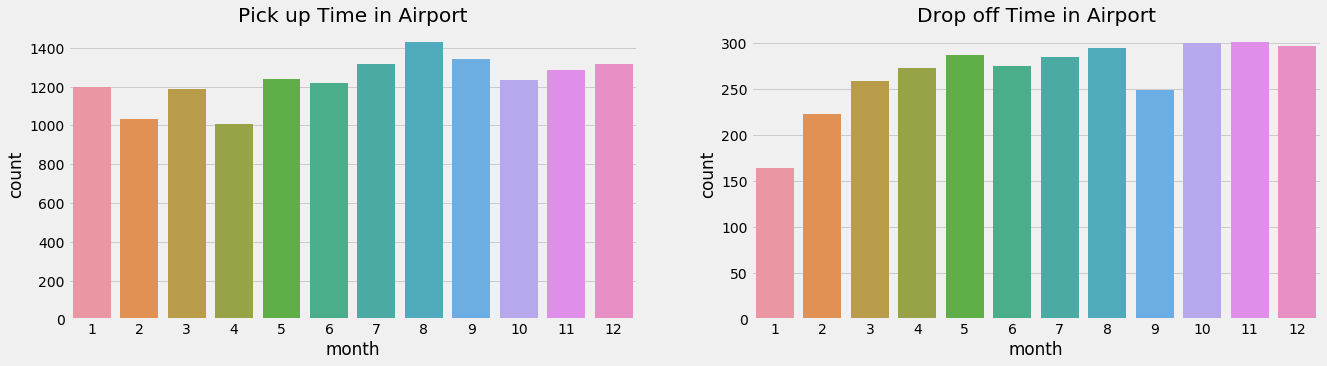

In [69]:
# Lets see the highest demand month for airports

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pick up Time in Airport')
ax=sns.countplot(x='month',data=from_airport,ax=ax9 )

ax10.set_title('Drop off Time in Airport')
ax=sns.countplot(x='month',data=to_airport,ax=ax10)

The usage of taxis increases between May and Aug, which is expected due to high travel demand in summer when people travel to NYC.

<a id='year_trip'></a>
## Trips per Year

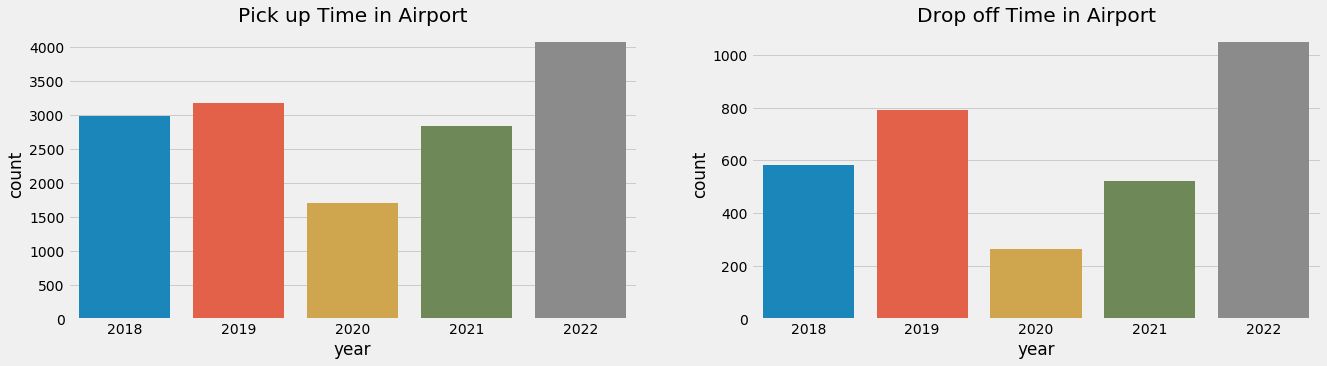

In [70]:
# Lets see the highest demand year for airports

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pick up Time in Airport')
ax=sns.countplot(x='year',data=from_airport,ax=ax9 )

ax10.set_title('Drop off Time in Airport')
ax=sns.countplot(x='year',data=to_airport,ax=ax10)

The COVID-19 pandemic caused a significant decrease in the total volume of airport trips observed in both 2020 and 2021.

<a id='payment'></a>
##  Payment Type 

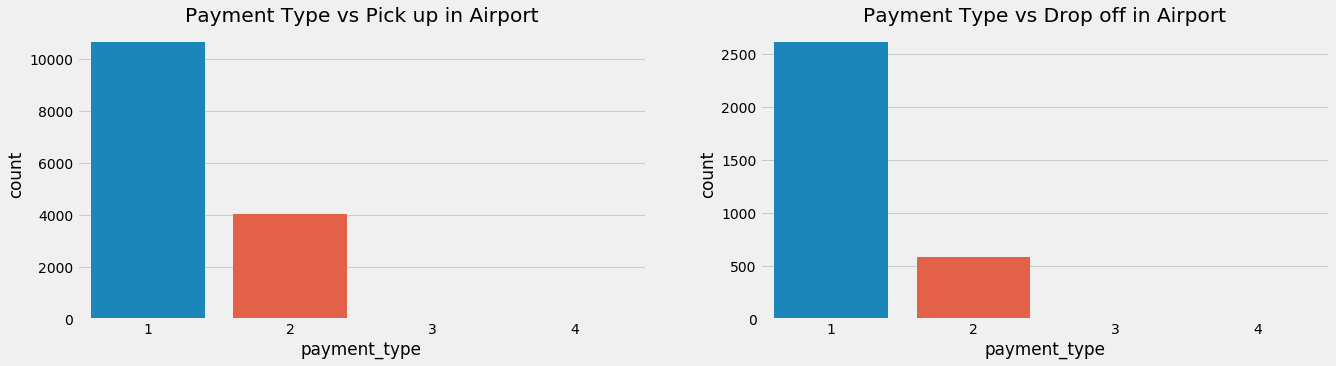

In [71]:
# Lets plot the payment type 

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Payment Type vs Pick up in Airport')
ax=sns.countplot(x='payment_type',data=from_airport,ax=ax9 )

ax10.set_title('Payment Type vs Drop off in Airport')
ax=sns.countplot(x='payment_type',data=to_airport,ax=ax10)


Based on the data dictionary we may have 6 type of peyment:
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown
6. Voided trip

We can see that passengers paid through the payment mode Credit card (1) more than any other payment mode.

<a id='amount'></a>
## Total Amount 

In [72]:
df.total_amount.describe()

count    17863.000000
mean        52.418987
std         18.778416
min          3.300000
25%         40.560000
50%         52.000000
75%         66.360000
max        243.500000
Name: total_amount, dtype: float64

(0, 120)

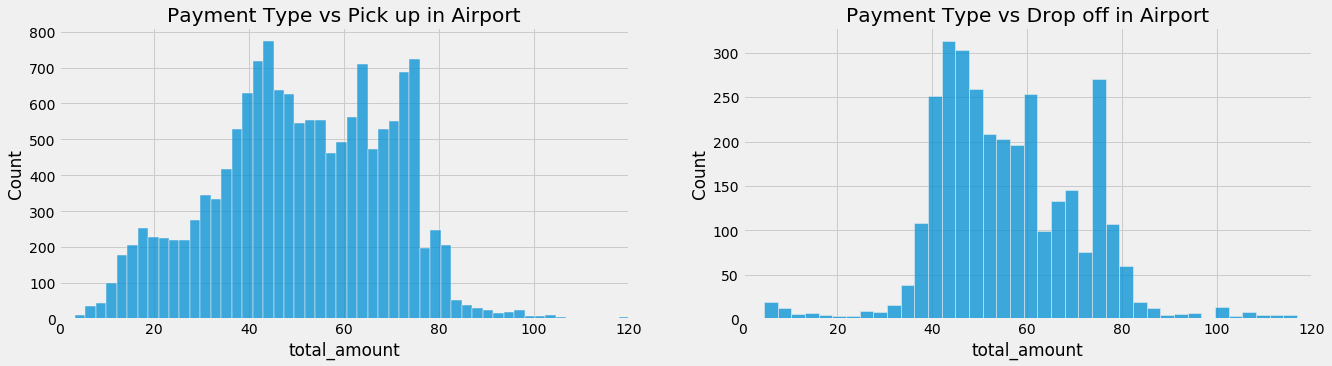

In [73]:
# Lets plot the total amount charged to passengers

figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Payment Type vs Pick up in Airport')
ax=sns.histplot(data=from_airport, x='total_amount',ax=ax9 )
ax9.set_xlim(left=0, right=120)

ax10.set_title('Payment Type vs Drop off in Airport')
ax=sns.histplot(data=to_airport, x='total_amount',ax=ax10)
ax10.set_xlim(left=0, right=120)

We can see people use more taxi when the total amount is almost in range of 40 - 50 $ as trips to airports. 

<a id=corr></a>
# Correlation Analysis

In [74]:
# Lets generating the correlation matrix

dff = df[{'vendor_id', 'passenger_count', 'trip_distance', 'rate_code_id','store_and_fwd_flag', 'payment_type','tip_amount','total_amount', 'day', 'hour', 'month','year', 'trip_duration', }]
corr = dff.corr()

<a id=heatmap></a>
## Heatmap

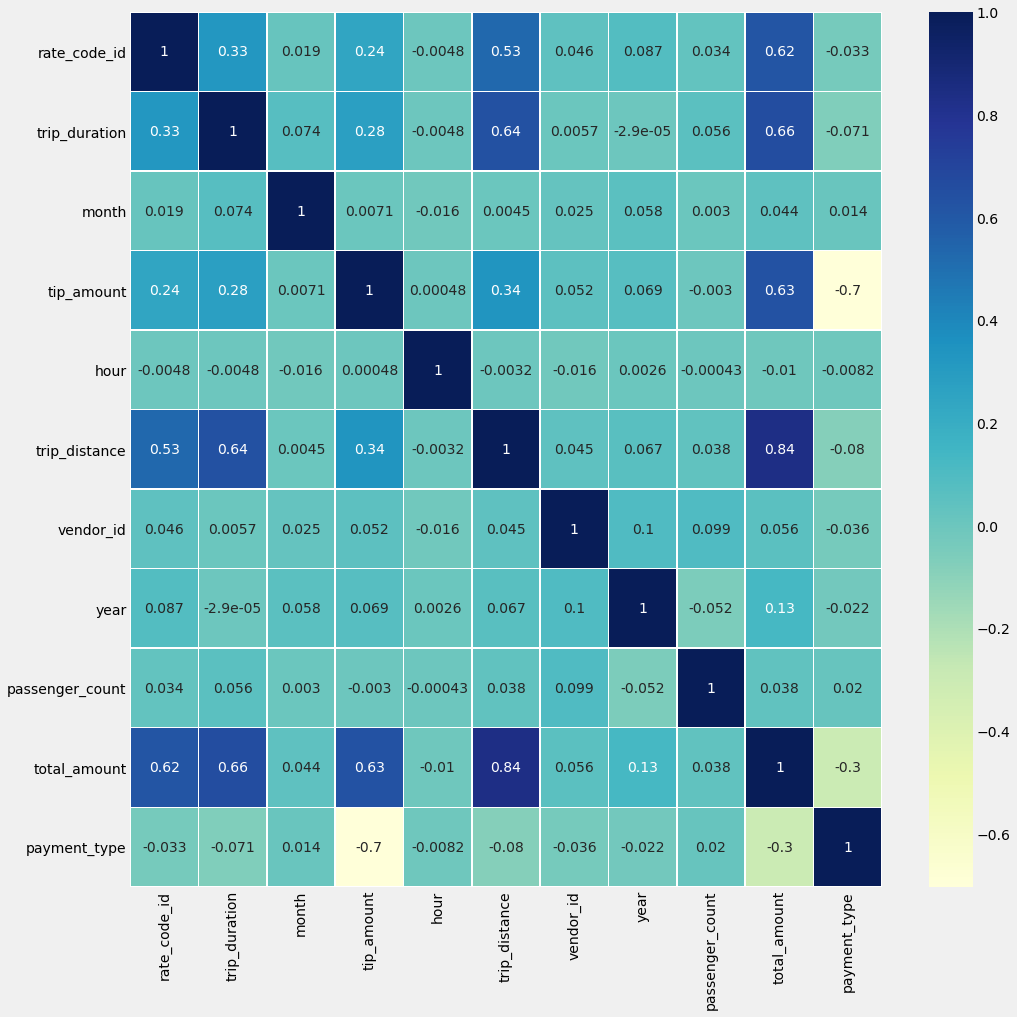

In [75]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=0.5);

most of the features shows there is no correlation.